<a href="https://colab.research.google.com/github/Siri2191/study_area/blob/main/WordCloud_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1>Análise de Sentimento e WordCloud com tweets sobre o ChatGPT no primeiro mês </h1>



> Em dezembro de 2022 foi lançado mais uma IA no mercado, chamada ChatGPT, dessa fez pela empresa [OpenIA](https://openai.com). Diferente das anteriores esta alcançou um enorme sucesso antes da virada do ano. Com três dias de "vida", já se havia mais de 5 milhões de usuarios pelo mundo inteiro.

> Um mês após seu lançamento, vem dando o que falar nas redes sociais. Alguns dizem que será o fim de varias caarreiras, outros que é o inicio de um novo futuro, e outros dizem que é apenas mais uma IA dentro das varias que apareceram. Indapendente da opinião, a plataforma Kaggle disponibilizou um dataset com aproximadamente 220 mil tweet's a respeito da desta IA captados um mês após seu lançamento. 


> link : https://www.kaggle.com/datasets/pcminh0505/chatgpt-twitter

> Sob porte deste dataset, decidi fazer uma analise de sentimento sobre os tweets afim de mensurar a relação das pessoas com esta nova IA. Para isso utilizei a biblioteca TextBlob e VaderSentiment. 

---


> In December 2022, another AI was launched on the market, called ChatGPT, this time by the company [OpenIA](https://openai.com). Unlike the previous ones, this one achieved a huge success before the turn of the year. With three days of "life", there were already more than 5 million users all over the world.

> A month after its launch, it has been making waves on social media. Some say that it will be the end of several careers, others that it is the beginning of a new future, and others say that it is just one more AI among the many that have appeared. Regardless of opinion, the Kaggle platform made available a dataset with approximately 220,000 tweets about this AI captured a month after its launch.


> link : https://www.kaggle.com/datasets/pcminh0505/chatgpt-twitter

> Based on this dataset, I decided to do a sentiment analysis on tweets in order to measure people's relationship with this new AI. For this I used the TextBlob and VaderSentiment library.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

data = pd.read_csv('/content/drive/MyDrive/Data_Science/NLP/chatgpt.csv')
data.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet_id       219294 non-null  int64 
 1   created_at     219294 non-null  object
 2   like_count     219294 non-null  int64 
 3   quote_count    219294 non-null  int64 
 4   reply_count    219294 non-null  int64 
 5   retweet_count  219294 non-null  int64 
 6   tweet          219294 non-null  object
 7   country        3648 non-null    object
 8   photo_url      68446 non-null   object
 9   city           3648 non-null    object
 10  country_code   3645 non-null    object
dtypes: int64(5), object(6)
memory usage: 18.4+ MB


##<h1>WordCloud com tweets</h1>

In [ ]:
tweet = data['tweet']
tweet[:4]


0    ChatGPT: Optimizing Language Models for Dialog...
1    Try talking with ChatGPT, our new AI system wh...
2    ChatGPT: Optimizing Language Models for Dialog...
3    THRILLED to share that ChatGPT, our new model ...
Name: tweet, dtype: object

In [ ]:
all_word = ' '.join([t for t in tweet])

In [ ]:
len(all_word)

31954876

In [ ]:
stopwords = STOPWORDS
stopwords.update(['http','https','n', 'nhttp','nhttps','ChatGPT','nChatGPT','t','co',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",])

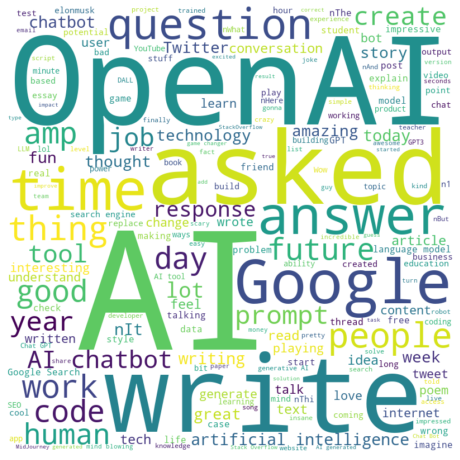

In [ ]:
wc = WordCloud(stopwords=stopwords,
               height=800,
               width=800,
               background_color = 'white',
               prefer_horizontal=1).generate(all_word)

fig, ax = plt.subplots(figsize=(8,18))
ax.set_axis_off()
plt.imshow(wc,interpolation='bilinear')
fig.show()

##<h1>Análise de Sentimento com VaderSentiment</h1>

In [ ]:


list_vs =[]
analyzer = SentimentIntensityAnalyzer()
for t in tweet:
    vs = analyzer.polarity_scores(t)
    list_vs.append(vs)

In [ ]:
score_vs = pd.DataFrame(list_vs)
score_vs['tweet'] = tweet

In [ ]:
score_vs.head()

,neg,neu,pos,compound,tweet
0,0.0,0.700,0.300,0.4588,ChatGPT: Optimizing Language Models for Dialog...
1,0.0,0.677,0.323,0.8225,"Try talking with ChatGPT, our new AI system wh..."
2,0.0,0.893,0.107,0.4588,ChatGPT: Optimizing Language Models for Dialog...
3,0.0,0.597,0.403,0.9029,"THRILLED to share that ChatGPT, our new model ..."
4,0.0,1.000,0.000,0.0000,"As of 2 minutes ago, @OpenAI released their ne..."


In [ ]:
score_vs.describe()

,neg,neu,pos,compound
count,219294.000000,219294.000000,219294.000000,219294.000000
mean,0.049174,0.839747,0.111079,0.187782
std,0.094063,0.147998,0.126587,0.416096
min,0.000000,0.085000,0.000000,-0.997800
25%,0.000000,0.748000,0.000000,0.000000
50%,0.000000,0.854000,0.083000,0.036400
75%,0.071000,1.000000,0.185000,0.510600
max,0.906000,1.000000,0.914000,0.998600


##<h1>Análise de sentimento Com TextBlob</h1>

In [ ]:


score_tb = pd.DataFrame()
polaridade = []
subjetividade = []

for t in tweet:
  blob = TextBlob(t)
  sentiment = blob.sentiment
  polaridade.append(sentiment[0])
  subjetividade.append(sentiment[1])

score_tb['polarity'] = polaridade
score_tb['subject'] = subjetividade



In [ ]:
score_tb['tweet'] = tweet
score_tb.head()

,polarity,subject,tweet
0,0.000000,0.000000,ChatGPT: Optimizing Language Models for Dialog...
1,0.136364,0.454545,"Try talking with ChatGPT, our new AI system wh..."
2,0.000000,0.000000,ChatGPT: Optimizing Language Models for Dialog...
3,0.302273,0.479242,"THRILLED to share that ChatGPT, our new model ..."
4,0.211039,0.495130,"As of 2 minutes ago, @OpenAI released their ne..."


In [ ]:
score_tb.describe()

,polarity,subject
count,219294.000000,219294.000000
mean,0.114359,0.381493
std,0.279116,0.321274
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.400000
75%,0.250000,0.608333
max,1.000000,1.000000


## Observações:

* Ao olhar a nuvem de palavras é possivel perceber muitas menções a propria empresa Open IA, porém tb é possivel ver menções ao Google. Nas primeiras semanas se falava muito que a IA iria substituir o google. 

* é possivel ver as palavras "asked", "question" e "answer", que são palavras muito ligadas as duvidas e pesquisas

* A unica palavra, com certa sgnificancia, que retrata um sentimento é a palavra "good" 

* As palavras "Write", "code", "work" apresentam sginificancia. Hoje muitas pessoas falam sobre a IA ajudar no num processo de escrita, melhorando textos ou até corrigindo erros ortograficos.

* sobre a analise de sentimento com o vaderSentiment, mostrou-se em sua maioria um sentimento de neutralidade e com o textBlob também, além de mostrar pouca subjetividade.



---
##Observations: 


* When looking at the word cloud, it is possible to see many mentions of the Open IA company itself, but it is also possible to see mentions of Google. In the first few weeks there was a lot of talk that AI was going to replace google.

* it is possible to see the words "asked", "question" and "answer", which are words closely linked to doubts and research

* The only word, with any significance, that portrays a feeling is the word "good"

* The words "Write", "code", "work" have meaning. Today many people talk about AI helping in a writing process, improving texts or even correcting spelling errors.

* about the analysis of sentiment with vaderSentiment, it was mostly a feeling of neutrality and with the textBlob as well, in addition to showing little subjectivity.




##Conclusão:

Sobre todo o trabalho feito na anlise dos tweets, a indicios de que não há um sentimento negativo ou positivo a cerca do ChatGPT. Ao olhar a nuvem de palavras, parece que as pessoas enchergam a IA como uma ferramenta de tirar duvidas ou aprimorar certas funcionalidades. 

---

##Conclusion:

About all the work done in the analysis of the tweets, the indications that there is no negative or positive feeling about the ChatGPT. When looking at the word cloud, it seems that people see AI as a tool to clear doubts or improve certain functionality.

